In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

In [16]:
class svm_classifier():
    
    def __init__(self, learning_rate = 0.001, lambda_ = 0.01, max_iter = 1000):
        self.learning_rate = learning_rate
        self.lambda_ = lambda_
        self.max_iter = max_iter
        self.weights = None
        self.b = None
        
    #transform the labels from (0,1) to (-1,1)
    def transform_y(self, y):
        y = np.where(y == 0, -1, 1)
        return y
    
    def fit_svm(self, x, y):
        self.weights = np.zeros(x.shape[1])
        self.b = 0
        y = self.transform_y(y)
        #this is stochastic gradient descent modification
        for j in range(self.max_iter):
            for i, xi in enumerate(x):
                condition = self.calc_condition(xi, y, i)
                dw, db = self.gradients(condition, xi, y, i)
                self.update_weights(dw, db)
                
                
    #the hinge loss value of a data point x_i            
    def calc_condition(self, x, y, i):
        condition = 1 - y[i]*(np.dot(x, self.weights) + self.b)
        return max(0, condition)
        
    #calculate the gradients of weights and bias    
    def gradients(self, condition, x, y, i):
        
        if condition == 0:
            dw = self.lambda_ * self.weights
            db = 0
    
        else:
            dw = self.lambda_*self.weights - y[i]*x
            db = -y[i]
        
        return dw, db
    
    def update_weights(self, dw, db):
        self.weights -= self.learning_rate*dw
        self.b -= db
        return 
    
    def predict(self, x):
        pred = np.matmul(self.weights, x.transpose()) + self.b
        return np.array([0 if p <= 0 else 1 for p in pred])
    
   

Testing the Implementation

In [17]:
X, y = make_blobs(
    n_samples=250, n_features=2, centers=2, cluster_std=1.05, random_state=1
)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, shuffle=True, random_state=1)

clf = svm_classifier(max_iter=1000)
clf.fit_svm(X_train, y_train)
predictions = clf.predict(X_test)

def accuracy(y_true, y_pred):
    accuracy = np.sum(y_true==y_pred) / len(y_true)
    return accuracy

print("SVM Accuracy: ", accuracy(y_test, predictions))

SVM Accuracy:  1.0


In [18]:
clf.weights

array([-0.30369204, -0.31004755])

Plot the hyperplane and the data points

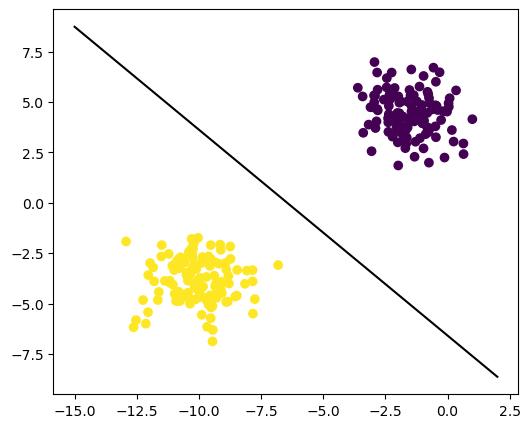

In [25]:
#x axe:
x0 = np.linspace(-15,2,500)
#hyperplane equation
x1 = -(1/clf.weights[0])* (clf.weights[1]*x0+clf.b)

plt.figure(figsize=(6,5))
plt.plot(x0, x1, color = 'black')
plt.scatter(X[:,0], X[:,1], c = y, cmap='viridis')
plt.show()